# Lending Club

### Problem Statement

A bank institution is interested in knowing if they clients applying for a loan will deferred or not.

### Dataset

The dataset is based in information gathered in clients that were granted a loan and consecuently they were classified as 'Fully paid' for not defaulted clients, 'Current' for individuals that are in the process of paying and 'Charged-off' for those who has not paid the installments in due time for a long period of time.

### Familiarization

First step in data analysis is to be familiarized with the dataset, understanding the metadata file because that contains all the variable names and their description which is important to deduct information from the variables and perform a good approach to solving the problem.

The following is a extract of the metadata file:

#### Import the necessary libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
#Now reading the metadata file and print some lines as example of how the file look like
metadata = pd.read_excel('Data_dictionary.xlsx',usecols=[0,1])
metadata = metadata.dropna()
metadata.head(10)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [61]:
#with the following command, let's explore how many columns our dataset has
metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  115 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


#### Load the csv file and check shape, head to have a glance of the data

In [62]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 111
df = pd.read_csv("loan.csv", low_memory=False)
df.shape

(39717, 111)

First to notice after looking at the metadata and the dataset is the inconsistency in the number of columns. Metadata showed 115, while dataset shows just 111. Then, let's find what features are not included in the dataset

In [63]:
mismatched_columns = [i for i in metadata['LoanStatNew'] if i not in df]
mismatched_columns 

['fico_range_high',
 'fico_range_low',
 'last_fico_range_high',
 'last_fico_range_low',
 'total_rev_hi_lim \xa0',
 'verified_status_joint']

#### Glance the data set

In [64]:
#Data set glance
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [65]:
df.shape

(39717, 111)

### Data Cleaning
##### 1. Find the columns with 40% + Nan Values. Analyze and drop if needed
##### 2. Find columns with no/ very low/very high unique values. Analyze and drop if needed
##### 3. Find all rows with 40% + Nan values. Analyze and drop them if needed

In [66]:
#find the % of NAN n each column
df.isna().sum().sort_values()/df.shape[0] * 100


id                              0.0
earliest_cr_line                0.0
inq_last_6mths                  0.0
open_acc                        0.0
pub_rec                         0.0
                              ...  
avg_cur_bal                   100.0
bc_open_to_buy                100.0
bc_util                       100.0
mo_sin_old_rev_tl_op          100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [67]:
#Find columns with more than 40% of Null values
df.columns[df.isna().sum() > 0.40*df.shape[0]]

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [68]:
#Drop columns with more than 40% null values
df_after_dropped_cols = df.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'])

##### Based on below analysis following columns can be dropped

- Desc
- url
- tax_liens
- delinq_amnt
- chargeoff_within_12_mths
- acc_now_delinq
- application_type
- policy_code
- collections_12_mths_ex_med
- initial_list_status
- pymnt_plan
- member_id
- id
- grade
- emp_title
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d

In [69]:
#New shape after dropping the columns
df_after_dropped_cols.shape

(39717, 54)

In [70]:
#columns with NA 
df_after_dropped_cols.isna().sum().sort_values().tail(10)

title                            11
tax_liens                        39
revol_util                       50
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
last_pymnt_d                     71
pub_rec_bankruptcies            697
emp_length                     1075
emp_title                      2459
desc                          12940
dtype: int64

In [71]:
#Let's Analyze the Desc column . It's just the description and not in formatted way so can be dropped
df_after_dropped_cols.desc.value_counts().sort_values()

  Borrower added on 07/25/11 > I will be using this loan for a major household purchase to include furniture. I have a good track record paying back loans to include my car and student loans.<br/>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         1
  Borrower added on 09/08/11 > Thank you to the investors who have already helped me to g

In [72]:
#Let's Analyze the url column. URL column is unique for every record and no relevant for study, 
#so can be dropped

df.url.nunique()

39717

In [73]:
#Let's drop the url and desc column because description is just some added strings and url is unique 
#per record and won't be needed for analysis

df_after_dropped_cols = df_after_dropped_cols.drop(columns=["desc","url"])

In [74]:
pd.Series({col:df[col].unique() for col in df_after_dropped_cols})

id                          [1077501, 1077430, 1077175, 1076863, 1075358, ...
member_id                   [1296599, 1314167, 1313524, 1277178, 1311748, ...
loan_amnt                   [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt                 [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...
funded_amnt_inv             [4975.0, 2500.0, 2400.0, 10000.0, 3000.0, 5000...
                                                  ...                        
acc_now_delinq                                                            [0]
chargeoff_within_12_mths                                           [0.0, nan]
delinq_amnt                                                               [0]
pub_rec_bankruptcies                                     [0.0, 1.0, 2.0, nan]
tax_liens                                                          [0.0, nan]
Length: 52, dtype: object

In [75]:
#drop these rows as the values are either same or nan. Member id and id can be dropped 
#as these are just identifier and won't be helpful in making insights
#['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq',  'application_type', 
#'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan', 'member_id', 'id']

df_after_dropped_cols = df_after_dropped_cols.drop(columns= ['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq',  'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan', 'member_id', 'id', 'sub_grade', 'emp_title', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']
)


In [76]:
#terms is in month let's convert to numeric and remove string "months" to make analysis easier
df_after_dropped_cols["term"] = df_after_dropped_cols.term.apply(lambda x: x.split(" ")[1]).astype('int64')

In [77]:
#int_rate is in % let's convert to float and remove string "%"
df_after_dropped_cols.int_rate=df_after_dropped_cols.int_rate.apply(lambda x: x[:-1]).astype('float64')

In [78]:
#For a better visualization of the column emp_length, its type is change it to str

df_after_dropped_cols['emp_length'] = df_after_dropped_cols['emp_length'].apply(lambda x: str(x))

In [79]:
df_after_dropped_cols.shape

(39717, 36)

In [80]:
df_after_dropped_cols.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,11219.443815,10947.713196,10397.448868,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,0.043260
std,7456.670694,7187.238670,7128.450439,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,0.204324
min,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,2.000000


#### Drop the columns with high > 0.9 correlation matrix

In [81]:
#Let's find the correlation matrix for each variable and sort it to see which has the highest.
corr = df_after_dropped_cols.corr().abs()
corr.unstack().sort_values(kind="quicksort")

pub_rec               open_acc                0.000172
open_acc              pub_rec                 0.000172
total_pymnt_inv       total_rec_late_fee      0.000796
total_rec_late_fee    total_pymnt_inv         0.000796
dti                   inq_last_6mths          0.001405
                                                ...   
total_rec_prncp       total_rec_prncp         1.000000
total_rec_int         total_rec_int           1.000000
total_rec_late_fee    total_rec_late_fee      1.000000
pub_rec               pub_rec                 1.000000
pub_rec_bankruptcies  pub_rec_bankruptcies    1.000000
Length: 576, dtype: float64

##### Dropping following columns based on based on below anlysis(comments in the code cell)

- dropping out_prncp
- out_prncp_inv 
- loan_amnt
- funded_amnt_inv
- total_rec_late_fee
- recoveries
- total_rec_int
- total_rec_prncp
- total_pymnt
- total_pymnt_inv
- collection_recovery_fee
- zip_code
- addr_state
- title
- revol_bal

In [82]:
#### keeping zipcode column doesn't make sense to get insight of defaulters
df_after_dropped_cols.zip_code.value_counts().head()

100xx    597
945xx    545
112xx    516
606xx    503
070xx    473
Name: zip_code, dtype: int64

In [83]:
#### keeping addr_state column doesn't make sense to get insight of defaulters
df_after_dropped_cols.addr_state.value_counts().head(10)

CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
Name: addr_state, dtype: int64

In [84]:
len(df_after_dropped_cols.title.value_counts().unique())

93

In [85]:
#dropping out_prncp, out_prncp_inv because it just shows how much principle is outstanding. 
#It doesn't provide very meaninful insight about the defaulters
#dropping loan_amnt,funded_amnt_inv as the data is very similar to funded_amnt
#total_rec_late_fee and recoveries can be dropped as it has 95%+ entries as 0
#total_rec_int','total_rec_prncp, total_pymnt,total_pymnt_inv, collection_recovery_fee  
#can be dropped as it's not giving much insight
#revol_bal is loan's post approval attribute so can be dropped
#title is not giving much info on defaulters and there are 93 unique values.

df_after_dropped_cols = df_after_dropped_cols.drop(columns=["out_prncp","out_prncp_inv",'loan_amnt','funded_amnt_inv', 'total_rec_late_fee', 'recoveries', 'total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt','collection_recovery_fee' ,'addr_state', 'zip_code','title','revol_bal'])
df_after_dropped_cols.shape

(39717, 21)

In [86]:
df_after_dropped_cols.describe()

,funded_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,pub_rec_bankruptcies
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000
mean,10947.713196,42.418007,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,22.088828,0.043260
std,7187.238670,10.622815,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,11.401709,0.204324
min,500.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000
25%,5400.000000,36.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,13.000000,0.000000
50%,9600.000000,36.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,20.000000,0.000000
75%,15000.000000,60.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,29.000000,0.000000
max,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,2.000000


In [87]:
df_after_dropped_cols.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,9.40%,4,0.0
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,98.50%,10,0.0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,21%,37,0.0
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,15,0,53.90%,38,0.0


#### cleaning up rows

In [88]:
#Let's find the rows which has more than 60% of non-null vales. 
#We will be dropping the remaining rows. 
#In this case we got all the rows having more than 60% non-null values so we won't drop anything.

len(df_after_dropped_cols.dropna(thresh=0.6*df_after_dropped_cols.shape[1], axis=0))


39717

In [89]:
df_after_dropped_cols.head()

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0,Jan-85,1,3,0,83.70%,9,0.0
1,2500,60,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0,Apr-99,5,3,0,9.40%,4,0.0
2,2400,36,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0,Nov-01,2,2,0,98.50%,10,0.0
3,10000,36,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0,Feb-96,1,10,0,21%,37,0.0
4,3000,60,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0,Jan-96,0,15,0,53.90%,38,0.0


In [90]:
df_after_dropped_cols.columns

Index(['funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [91]:
df_after_dropped_cols.shape[1]

21

### Outliers

After cleaning null values, let's analyze outliers for the following variables
#### Removing outliers - Removing rows < 25th percentile - 1.5 * IQR and > 75th %ile + 1.5IQR

#### funded_amt outlier treatment

<AxesSubplot:xlabel='funded_amnt'>

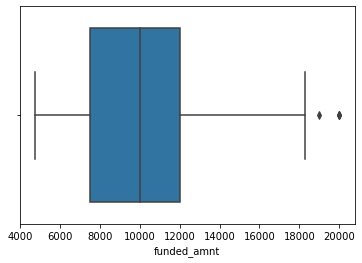

In [132]:
# Using a boxplot chart for looking at outliers for funded_amnt

sns.boxplot(x=df_after_dropped_cols['funded_amnt'])


In [93]:
funded_amnt_25th_percentile = np.quantile(df_after_dropped_cols.funded_amnt, 0.25)
funded_amnt_75th_percentile =np.quantile(df_after_dropped_cols.funded_amnt, 0.75)
IQR=funded_amnt_75th_percentile - funded_amnt_25th_percentile
outliers_lower = funded_amnt_25th_percentile - 1.5*IQR

outliers_upper=funded_amnt_75th_percentile + 1.5*IQR

df_after_dropped_cols=df_after_dropped_cols[(df_after_dropped_cols['funded_amnt']>outliers_lower) & (df_after_dropped_cols['funded_amnt']<outliers_upper)]

<AxesSubplot:xlabel='funded_amnt'>

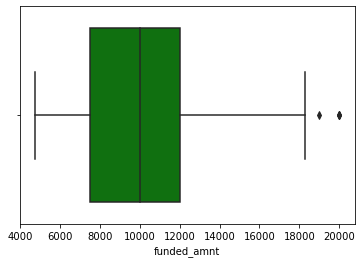

In [131]:
sns.boxplot(x=df_after_dropped_cols['funded_amnt'],color='Green')


#### Installment outlier treatment

<AxesSubplot:xlabel='installment'>

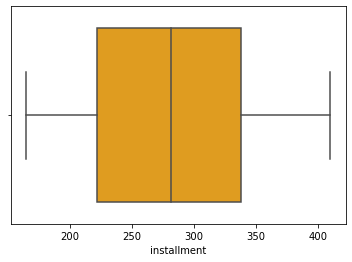

In [130]:
# Installment outliers graph analysis

sns.boxplot(x=df_after_dropped_cols['installment'],color='Orange')


In [96]:
installment_25th_percentile = np.quantile(df_after_dropped_cols.installment, 0.25)
installment_75th_percentile =np.quantile(df_after_dropped_cols.installment, 0.75)
IQR=installment_75th_percentile - installment_25th_percentile
df_after_dropped_cols=df_after_dropped_cols[(df_after_dropped_cols['installment']>installment_25th_percentile) & (df_after_dropped_cols['installment']<installment_75th_percentile)]

<AxesSubplot:xlabel='installment'>

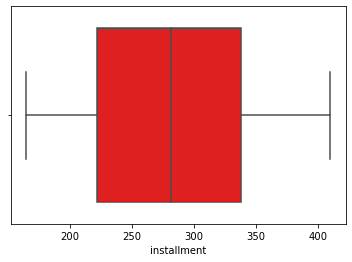

In [129]:
# installment after removing outlier
sns.boxplot(x=df_after_dropped_cols['installment'],color='Red')

#### open_acc outlier treatment

<AxesSubplot:xlabel='open_acc'>

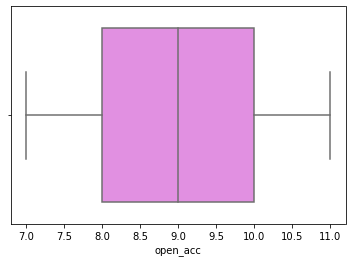

In [133]:
#Visual analysis of outliers for open_acc

sns.boxplot(x=df_after_dropped_cols['open_acc'],color='Violet')

In [99]:
#Dropping outliers for open_acc

open_acc_25th_percentile = np.quantile(df_after_dropped_cols.open_acc, 0.25)
open_acc_75th_percentile =np.quantile(df_after_dropped_cols.open_acc, 0.75)
IQR=open_acc_75th_percentile - open_acc_25th_percentile
df_after_dropped_cols=df_after_dropped_cols[(df_after_dropped_cols['open_acc']>open_acc_25th_percentile) & (df_after_dropped_cols['open_acc']<open_acc_75th_percentile)]


<AxesSubplot:xlabel='open_acc'>

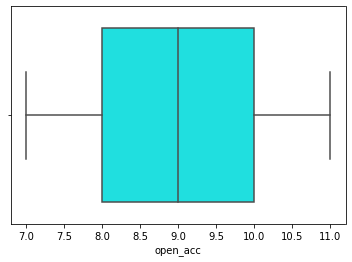

In [139]:
#open_acc after removing outlier
sns.boxplot(x=df_after_dropped_cols['open_acc'],color='Cyan')

#### annual_inc outlier treatment

<AxesSubplot:xlabel='annual_inc'>

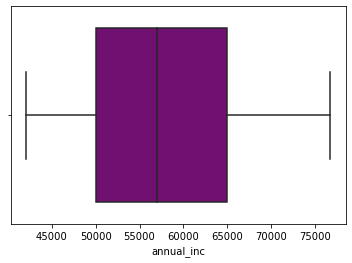

In [142]:
#Visual analysis of outliers for open_acc

sns.boxplot(x=df_after_dropped_cols['annual_inc'],color='Purple')

In [102]:
#Dropping outliers for open_acc

annual_inc_25th_percentile = np.quantile(df_after_dropped_cols.annual_inc, 0.25)
annual_inc_75th_percentile =np.quantile(df_after_dropped_cols.annual_inc, 0.75)
IQR=annual_inc_75th_percentile - annual_inc_25th_percentile
df_after_dropped_cols=df_after_dropped_cols[(df_after_dropped_cols['annual_inc']>annual_inc_25th_percentile) & (df_after_dropped_cols['annual_inc']<annual_inc_75th_percentile)]


<AxesSubplot:xlabel='annual_inc'>

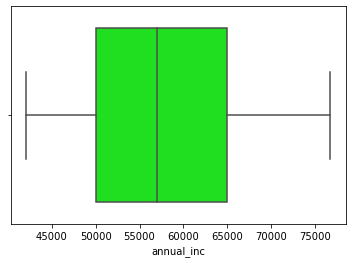

In [145]:
#Annual income after removing outlier
sns.boxplot(x=df_after_dropped_cols['annual_inc'],color='Lime')

### Insights

- Loan Status (Fully paid vs current vs charged off)

#### Observation - ~13.6% customers are defaulters

<AxesSubplot:ylabel='loan_status'>

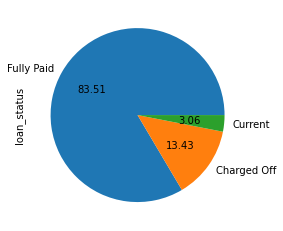

In [104]:
#82.96% customer has paid the loan fully while 13.59% customer are defaulters leading to financial loss
df_after_dropped_cols.loan_status.value_counts().plot.pie(autopct='%.2f')

In [105]:
#### Observation - ~73% customers goes shorter term loan(36 months) and 27% customers go for longer term loan( years)

<AxesSubplot:ylabel='term'>

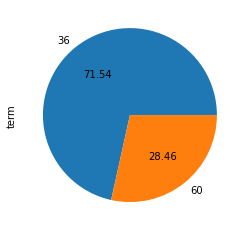

In [106]:
df_after_dropped_cols.term.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot:>

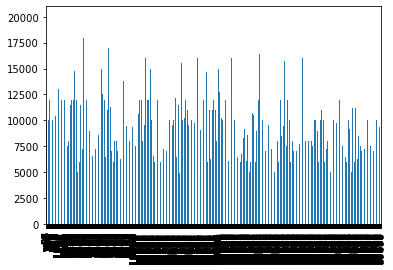

In [107]:
df_after_dropped_cols.funded_amnt.plot.bar(x="funded_amnt",y="loan_status")

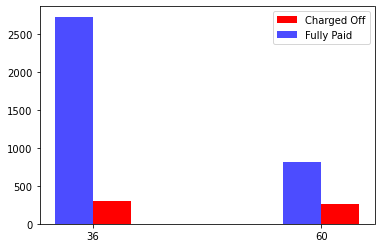

In [108]:
#Graph comparing the loan term among deferral and non-deferral

fig, ax = plt.subplots()
charged_off = ax.bar(df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['term'].unique(),df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['term'].value_counts(),color='Red',width = 4,align='edge')
charged_off.set_label('Charged Off')

fully_pay = ax.bar(df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Fully Paid']['term'].unique(),df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Fully Paid']['term'].value_counts(), alpha=0.7, color='Blue',width = -4,align='edge')
fully_pay.set_label('Fully Paid')
plt.xticks([36,60],[36,60])
plt.legend()
plt.show()



#### Observation - There is strong trend for no defaulters to prefer 36 months as term for the loan. Contrary to defaulters who prefer sligthly a longer term loan. 

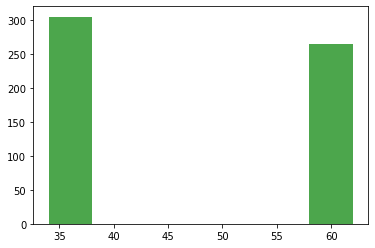

In [121]:
# Graph for term feature for Defaulter

plt.bar(df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['term'].unique(),df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['term'].value_counts(), alpha=0.7, color='Green',width = 4)
plt.show()

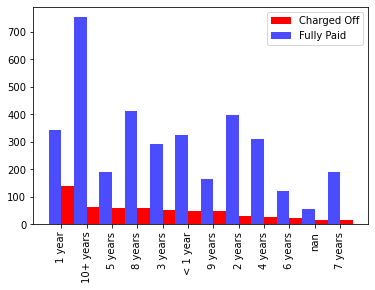

In [109]:
fig, ax = plt.subplots()
charged_off = ax.bar(df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['emp_length'].unique(),df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['emp_length'].value_counts(),color='Red',width = .5,align='edge')
charged_off.set_label('Charged Off')

fully_pay = ax.bar(df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Fully Paid']['emp_length'].unique(),df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Fully Paid']['emp_length'].value_counts(), alpha=0.7, color='Blue',width = -.5,align='edge')
fully_pay.set_label('Fully Paid')

plt.xticks(df_after_dropped_cols['emp_length'].unique(),rotation=90)
plt.legend()
plt.show()

The majority of individual who fully paid the loan has preserved their employment status for more than 10 years. However, those who charged off are more likely to have less than a year of employment.

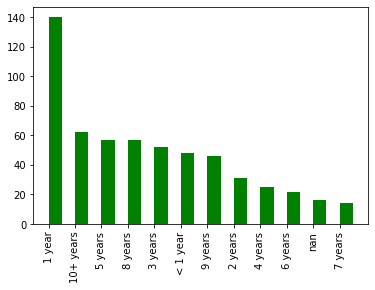

In [114]:
#Graph for emp_length feature for defaulters

plt.bar(df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['emp_length'].unique(),df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off']['emp_length'].value_counts(),color='Green',width = .5,align='edge')
plt.xticks(rotation=90)
plt.show()

#### Observation - People on rent and mortgage are more likely to default when compared to the one with own house

In [815]:
df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off'].home_ownership.value_counts()

RENT        282
MORTGAGE    253
OWN          35
Name: home_ownership, dtype: int64

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

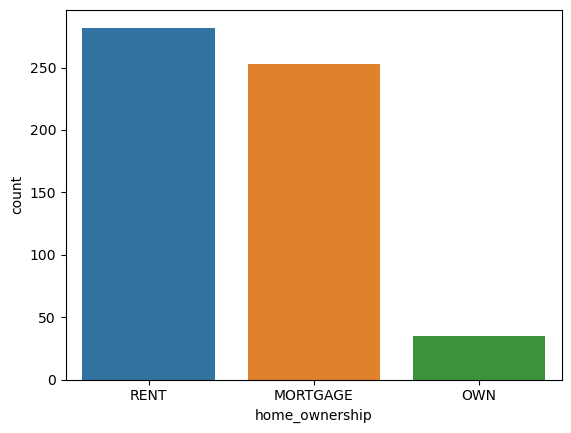

In [816]:
fig, ax = plt.subplots()
sns.countplot(x='home_ownership', data=df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off'])

#### Observation - 20% of people with atleast 1 public record bankruptcies couldn't pay the loan while 13% with no public record bankruptcies ended up defaulting

In [817]:
df_after_dropped_cols.pub_rec_bankruptcies.value_counts()

0.0    3983
1.0     198
2.0       1
Name: pub_rec_bankruptcies, dtype: int64

In [818]:
df_after_dropped_cols.pub_rec_bankruptcies[df_after_dropped_cols['loan_status']=='Charged Off'].value_counts()

0.0    523
1.0     38
2.0      1
Name: pub_rec_bankruptcies, dtype: int64

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

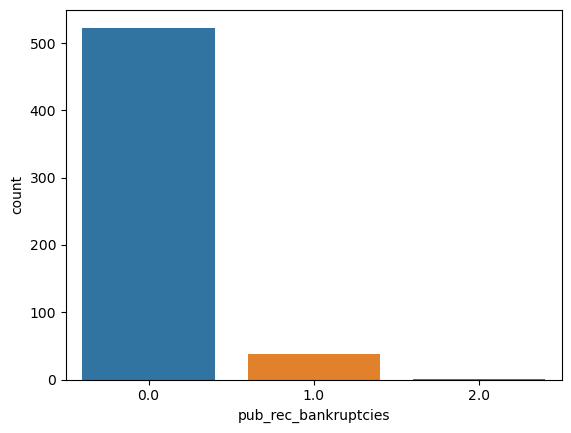

In [820]:
fig, ax = plt.subplots()
sns.countplot(x='pub_rec_bankruptcies', data=df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off'])

#### Observation -  People with lower salary is more likely to default. Trend shows people with salary between 40k-70k has around 15% chance to default while the one in higher income group of 70k-85k has 11% chance



In [843]:
df_after_dropped_cols.annual_inc_bins[df_after_dropped_cols['loan_status']=='Charged Off'].value_counts()

40k-55k    232
55k-70k    222
70k-85k    116
Name: annual_inc_bins, dtype: int64

In [840]:
df_after_dropped_cols.annual_inc_bins.value_counts()

40k-55k    1626
55k-70k    1623
70k-85k     995
Name: annual_inc_bins, dtype: int64

<AxesSubplot:xlabel='annual_inc_bins', ylabel='count'>

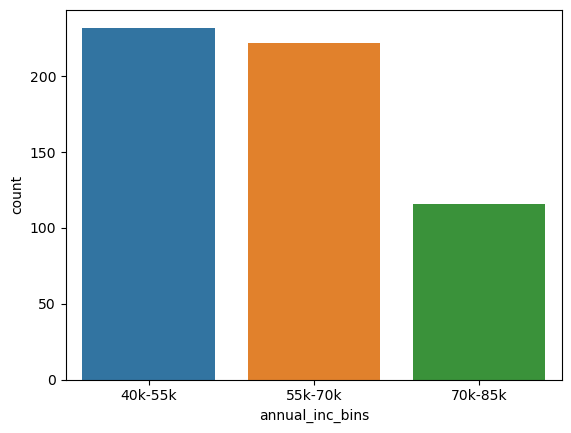

In [841]:
df_after_dropped_cols['annual_inc_bins'] = pd.cut(df_after_dropped_cols['annual_inc'], bins=3,precision =0,labels =['40k-55k','55k-70k','70k-85k'])
fig, ax = plt.subplots()
sns.countplot(x='annual_inc_bins', data=df_after_dropped_cols[df_after_dropped_cols.loan_status == 'Charged Off'])

#### Observation - Trend shows people with unverified income source are more likely to default.

<AxesSubplot:xlabel='verification_status', ylabel='count'>

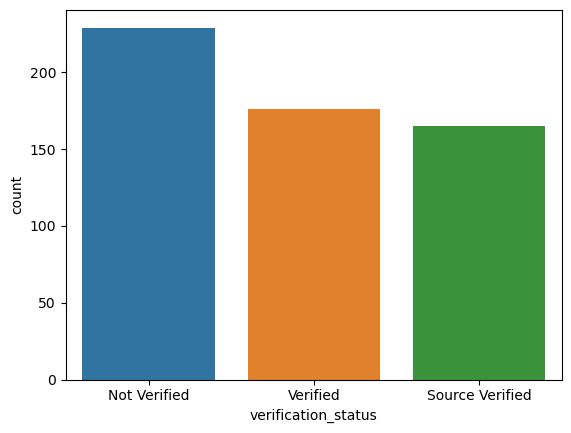

In [847]:
sns.countplot(x='verification_status', data=df_after_dropped_cols[df_after_dropped_cols['loan_status']=='Charged Off'])